# Analyzing an albatross wing
by: Neil Sawhney

<img src="albatross.png" width="500"/>
<img src="airfoil.png" width="500"/>

## Import the mean camber line from http://airfoiltools.com/airfoil/details?airfoil=goe173-il

In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("albatross_foil-camber_line.csv")

# Display the first 5 rows
display(df.head())

x_foil = df["X(mm)"].tolist()
y_foil = df["Y(mm)"].tolist()

,X(mm),Y(mm)
0,0.000,0.000000
1,1.241,0.978000
2,2.486,1.335821
3,4.978,2.261891
4,7.473,3.007482


## Interpolate the data into a function so that we can keep things analytical and symbolic

$y(x) = \begin{cases} 0.0757438198145068 x^{3} - 0.48369211108273 x^{2} + 1.27168442585302 x & \text{for}\: x \geq 0 \wedge x \leq 2.486 \\- 0.0164005768176812 x^{3} + 0.203520799000128 x^{2} - 0.436726868612968 x + 1.41570349268081 & \text{for}\: x \geq 2.486 \wedge x \leq 4.978 \\0.0051175805847793 x^{3} - 0.117831363648218 x^{2} + 1.16296419705049 x - 1.23871721561009 & \text{for}\: x \geq 4.978 \wedge x \leq 7.473 \\- 0.000365930224799395 x^{3} + 0.00510346519172705 x^{2} + 0.244272221129586 x + 1.0497444964089 & \text{for}\: x \geq 7.473 \wedge x \leq 9.968 \\- 0.000199278194540061 x^{3} + 0.000119902878852579 x^{2} + 0.293948370264324 x + 0.884687211550524 & \text{for}\: x \geq 9.968 \wedge x \leq 14.962 \\0.000245238196808445 x^{3} - 0.0198326598632167 x^{2} + 0.592478614011156 x - 0.604182624096177 & \text{for}\: x \geq 14.962 \wedge x \leq 19.958 \\0.00012274930637512 x^{3} - 0.0124987600374118 x^{2} + 0.446108641287747 x + 0.369568014441756 & \text{for}\: x \geq 19.958 \wedge x \leq 29.956 \\- 3.90384183972492 \cdot 10^{-5} x^{3} + 0.00204077921243152 x^{2} + 0.0105622035194419 x + 4.71864437770423 & \text{for}\: x \geq 29.956 \wedge x \leq 39.956 \\2.88369943703519 \cdot 10^{-5} x^{3} - 0.00609531076519523 x^{2} + 0.335647814665496 x + 0.388937484720252 & \text{for}\: x \geq 39.956 \wedge x \leq 49.96 \\1.873961567553 \cdot 10^{-5} x^{3} - 0.0045819156464153 x^{2} + 0.260038594531253 x + 1.64808303068919 & \text{for}\: x \geq 49.96 \wedge x \leq 59.965 \\2.10662735920923 \cdot 10^{-5} x^{3} - 0.00500046977231526 x^{2} + 0.28513719269084 x + 1.14640388447584 & \text{for}\: x \geq 59.965 \wedge x \leq 69.972 \\6.97096097190038 \cdot 10^{-6} x^{3} - 0.00204163812833513 x^{2} + 0.0781018248982628 x + 5.97529680286998 & \text{for}\: x \geq 69.972 \wedge x \leq 79.98 \\- 1.90634019269676 \cdot 10^{-5} x^{3} + 0.00420504690561922 x^{2} - 0.421508044117408 x + 19.2948959108278 & \text{for}\: x \geq 79.98 \wedge x \leq 89.989 \\- 0.000149790157233174 x^{3} + 0.0394969568553698 x^{2} - 3.59739172858552 x + 114.559761538028 & \text{for}\: x \geq 89.989 \wedge x \leq 100.0 \end{cases}$

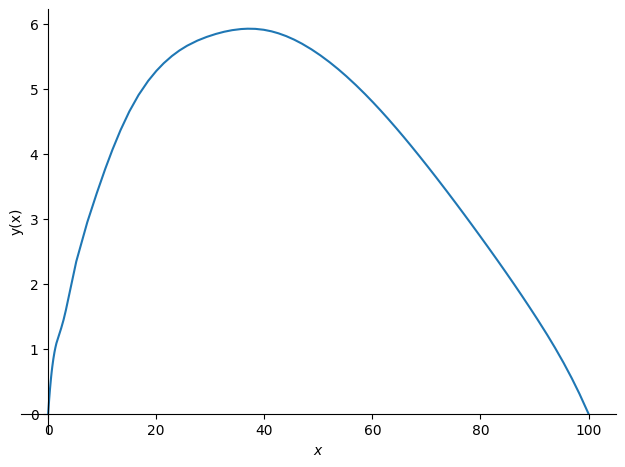

In [2]:
import sympy as sp
from IPython.display import Markdown

alpha, theta, x = sp.symbols("alpha, theta, x")
chord_length_data = 100 # mm

# Construct an interpolating polynomial for x_foil and y_foil
y_func_x = sp.interpolating_spline(3, x, x_foil, y_foil)
display(Markdown("$y(x) = " + sp.latex(y_func_x) + "$"))
sp.plot(y_func_x, (x, 0, chord_length_data), ylabel="y(x)")

## Now let's get derivatives and do a variable substitution to get the function in terms of $\theta$ instead of x

$\frac{dy}{dx}(\theta) = \begin{cases} 568.078648608801 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 48.369211108273 \cos{\left(\theta \right)} - 47.09752668242 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -2.486 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq 0 \\- 123.004326132609 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 20.3520799000128 \cos{\left(\theta \right)} + 19.9153530313998 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -4.978 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -2.486 \\38.3818543858447 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 11.7831363648218 \cos{\left(\theta \right)} - 10.6201721677713 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -7.473 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -4.978 \\- 2.74447668599546 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 0.510346519172705 \cos{\left(\theta \right)} + 0.754618740302291 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -9.968 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -7.473 \\- 1.49458645905046 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 0.0119902878852579 \cos{\left(\theta \right)} + 0.305938658149582 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -14.962 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -9.968 \\1.83928647606334 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 1.98326598632167 \cos{\left(\theta \right)} - 1.39078737231051 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -19.958 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -14.962 \\0.9206197978134 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 1.24987600374118 \cos{\left(\theta \right)} - 0.803767362453429 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -29.956 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -19.958 \\- 0.292788137979369 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 0.204077921243152 \cos{\left(\theta \right)} + 0.214640124762594 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -39.956 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -29.956 \\0.216277457777639 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 0.609531076519523 \cos{\left(\theta \right)} - 0.273883261854027 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -49.96 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -39.956 \\0.140547117566475 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 0.45819156464153 \cos{\left(\theta \right)} - 0.198152970110277 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -59.965 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -49.96 \\0.157997051940692 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 0.500046977231526 \cos{\left(\theta \right)} - 0.214909784540686 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -69.972 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -59.965 \\0.0522822072892529 \left(1 - \cos{\left(\theta \right)}\right)^{2} + 0.204163812833513 \cos{\left(\theta \right)} - 0.12606198793525 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -79.98 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -69.972 \\- 0.142975514452257 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 0.420504690561922 \cos{\left(\theta \right)} - 0.00100335355548548 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -89.989 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -79.98 \\- 1.1234261792488 \left(1 - \cos{\left(\theta \right)}\right)^{2} - 3.94969568553698 \cos{\left(\theta \right)} + 0.352303956951467 & \text{for}\: 50.0 \cos{\left(\theta \right)} - 50.0 \geq -100.0 \wedge 50.0 \cos{\left(\theta \right)} - 50.0 \leq -89.989 \end{cases}$

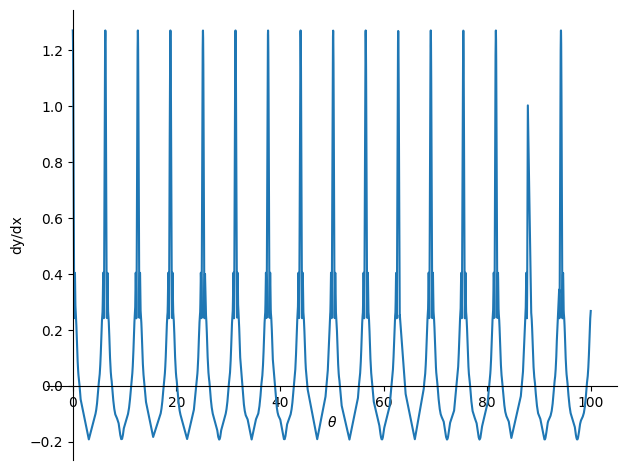

In [3]:
# Differentiate y_func_x with respect to x
dydx_func_x = y_func_x.diff(x)

# Variable substitution from x to theta
dydx_func_theta = dydx_func_x.subs(x, chord_length_data / 2 * (1 - sp.cos(theta)))
display(Markdown("$\\frac{dy}{dx}(\\theta) = " + sp.latex(dydx_func_theta) + "$"))
sp.plot(dydx_func_theta, (theta, 0, chord_length_data), ylabel="dy/dx")

## Now we can get the lift coefficient!

In [4]:
# Calculate the lift coefficient
coeff_lift_albatross = (
    2
    * sp.pi
    * (
        alpha
        + (1 / sp.pi)
        * sp.integrate(dydx_func_theta * (sp.cos(theta) - 1), (theta, 0, sp.pi))
    )
).evalf()

# Display the equation
display(Markdown("$C_l = " + sp.latex(coeff_lift_albatross) + "$"))

$C_l = 6.28318530717959 \alpha + 0.63959809779726$

## Calculate lift for a speed v, with a span of b, chord_length of c, through air with density $\rho$

In [5]:
cruising_velocity, span_length, density, chord_length, coeff_lift = sp.symbols("u_{\\infty}, b, rho, c, C_l")

# Calculate the lift
lift = sp.Rational(1, 2) * density * cruising_velocity ** 2 * span_length * chord_length * coeff_lift
display(Markdown("$L = " + sp.latex(lift) + "$"))

$L = \frac{C_{l} b c \rho u_{\infty}^{2}}{2}$

## Find the angle of attack at steady altitude ($\alpha_0$)

In [6]:
albatross_weight = sp.symbols("W")

# Find the angle of attack at steady altitude
alpha_0 = sp.solve((lift - albatross_weight).subs(coeff_lift, coeff_lift_albatross), alpha, dict=True)[0][alpha]
display(Markdown("$\\alpha_0 = " + sp.latex(alpha_0) + "$"))

$\alpha_0 = \frac{0.31830988618379 W}{b c \rho u_{\infty}^{2}} - 0.101795198856607$

## Evaluating for properties of an Albatross moving at cruising speed

In [7]:
albatross_data = {
    "W": 8*9.81,  # N
    "u_{\\infty}": 20,  # m/s
    "b": 3,  # m
    "rho": 1.225,  # kg/m^3
    "c": 0.3,  # m
    "C_l": coeff_lift_albatross,
}


def radians_to_degrees(radians):
    return 180 / sp.pi * radians


def degrees_to_radians(degrees):
    return sp.pi / 180 * degrees


# Compute the angle of attack at steady altitude in degrees
alpha_0_albatross = radians_to_degrees(alpha_0).evalf(subs=albatross_data)
display(Markdown("$\\alpha_0 = " + sp.latex(round(alpha_0_albatross, 2)) + "^\\circ $"))

$\alpha_0 = -2.59^\circ $

## Lets compare the lift to a small aircraft with a 50 mph cruise speed, 6 ft span, and 1 ft chord length, using the NACA 4412 airfoil at 2 degrees angle of attack

In [8]:
aircraft_data = {
    "u_{\\infty}": 22.352,  # m/s
    "b": 1.8288,  # m
    "rho": 1.225,  # kg/m^3
    "c": 0.3048,  # m
    "C_l": 6.28 * degrees_to_radians(2) + 25.18,
}

# Compute the lift at a 2 degree angle of attack for the albatross
lift_albatross = lift.subs(albatross_data).subs(alpha, degrees_to_radians(2)).evalf()
display(Markdown("Albatross: $L = " + sp.latex(round(lift_albatross, 2)) + " N$"))

# Compute the lift at a 2 degree angle of attack for the aircraft
lift_aircraft = lift.subs(aircraft_data).subs(alpha, degrees_to_radians(2)).evalf()
display(Markdown("Aircraft: $L = " + sp.latex(round(lift_aircraft, 2)) + " N$"))

Albatross: $L = 189.39 N$

Aircraft: $L = 4332.52 N$

Airfoil wing area S, span b, aspect ratio AR, chord vs. position (c(y)), twist distribution, lift to drag slope m and zero lift angle of attack are obtained / estimated from http://airfoiltools.com/airfoil/details?airfoil=goe173-il.

In [9]:
import sympy as sp
from IPython.display import display, Markdown

(
    b_span,  # chord length
    V_infty,  # free stream velocity
    theta_0,  # specific spanwise coordinate parameter
    alpha,  # geometric AOA
    AR,  # aspect ratio
    S,  # planiform area
) = sp.symbols("b_{span}, V_{\\infty}, \\theta_{0}, \\alpha, AR, S")

vals = {
    b_span : 3.1,  # (meter)
    V_infty : 20,  # (meter/second)
    S : 2*.336,  # (meter^2) 
}

derived_vals = {
    AR : (b_span**2/S).subs(vals),  
}
vals.update(derived_vals)

In [10]:
(
    c,  # chord length (m)
    m_0,  # section lift slope (1/rad)
    alpha_abs,  # absolute angle of attack [alpha - alpha_L0] (radians)
) = sp.symbols("c, m_0, \\alpha_{a}")

wing_vals = {
    # c : (3 + (b_span/8) * sp.cos(theta_0)).subs(vals),  # (meter)
    m_0 : (5.729),  # (1/rad)
    # alpha_abs : (-.1013 + .14 + .0872),  # (radian)
    alpha_abs : (-.1013 + .0872),  # (radian)
}
vals.update(wing_vals)
display(
    Markdown(
        f'${sp.latex(vals)}$'
    )
)

$\left\{ AR : 14.3005952380952, \  S : 0.672, \  V_{\infty} : 20, \  \alpha_{a} : -0.0141, \  b_{span} : 3.1, \  m_{0} : 5.729\right\}$

In [11]:
(
    A_1,
    A_2,
    A_3,
) = sp.symbols("A_1, A_2, A_3")

A_n_eq = sp.Eq(
    alpha_abs,
    ((4 * b_span * sp.sin(theta_0)) / (m_0 * c) + 1) * A_1
    + (
        ((4 * b_span * sp.sin(2 * theta_0)) / (m_0 * c))
        + 2 * ((sp.sin(2 * theta_0)) / (sp.sin(theta_0)))
    )
    * A_2
    + (
        ((4 * b_span * sp.sin(3 * theta_0)) / (m_0 * c))
        + 3 * ((sp.sin(3 * theta_0)) / (sp.sin(theta_0)))
    )
    * A_3
)

display(A_n_eq)

Eq(\alpha_{a}, A_1*(4*b_{span}*sin(\theta_{0})/(c*m_0) + 1) + A_2*(4*b_{span}*sin(2*\theta_{0})/(c*m_0) + 2*sin(2*\theta_{0})/sin(\theta_{0})) + A_3*(4*b_{span}*sin(3*\theta_{0})/(c*m_0) + 3*sin(3*\theta_{0})/sin(\theta_{0})))

In [12]:
A_n_sol = sp.solve(
    [
        A_n_eq.subs(vals).subs(
            {
                theta_0 : 2.288,
                c : 642.33e-3
            }
        ),
        A_n_eq.subs(vals).subs(
            {
                theta_0 : 2.836,
                c : 512.53e-3
            }
        ),
        A_n_eq.subs(vals).subs(
            {
                theta_0 : 2.870,
                c : 499.97e-3
            }
        ),
    ],
    [A_1, A_2, A_3],
    dict=True,
)[0]

vals[A_1] = A_n_sol[A_1]
vals[A_2] = A_n_sol[A_2]
vals[A_3] = A_n_sol[A_3]

display(
    Markdown(
        f'${sp.latex(A_1)} = {sp.latex(A_1.subs(vals))}$'
    )
)

display(
    Markdown(
        f'${sp.latex(A_2)} = {sp.latex(A_2.subs(vals))}$'
    )
)

display(
    Markdown(
        f'${sp.latex(A_3)} = {sp.latex(A_3.subs(vals))}$'
    )
)

$A_{1} = -0.148620074888356$

$A_{2} = -0.106095834055294$

$A_{3} = -0.0300460068456091$

## Calculate $\delta$

In [13]:
(
    delta,
    efficiency,
) = sp.symbols("\\delta, e")

efficiency_vals = {
    delta : (2*(A_2/A_1)**2 + 3*(A_3/A_1)**2).subs(vals)
}
vals.update(efficiency_vals)

efficiency_expr = 1/(1+delta)
vals[efficiency] = efficiency_expr.subs(vals)

display(
    Markdown(
        f'${sp.latex(efficiency)} = {sp.latex(efficiency_expr)} = {sp.latex(efficiency.subs(vals))}$'
    )
)

$e = \frac{1}{\delta + 1} = 0.466887676894223$

## Calculate $C_L, C_{D,i}$

In [14]:
(
    C_L,
    C_D_induced,
) = sp.symbols("C_L, C_{D\,i}")

drag_coeff_vals = {
    C_L : (A_1 * sp.pi * AR).subs(vals),
}
vals.update(drag_coeff_vals)

C_D_induced_exprs = (C_L**2 * (1+delta)) / (sp.pi*AR)
vals[C_D_induced] = C_D_induced_exprs.subs(vals)

display(
    Markdown(
        f'${sp.latex(C_D_induced)} = {sp.latex(C_D_induced_exprs)} = {sp.latex(C_D_induced.subs(vals))}$'
    )
)

$C_{D,i} = \frac{C_{L}^{2} \left(\delta + 1\right)}{\pi AR} = 0.676544947410097 \pi$

## Calculate $D_i$

In [15]:
(
    rho_air,
    q_infty,
    D_induced,
) =  sp.symbols("rho_{air}, q_{\\infty}, D_{i}")

drag_vals = {
    rho_air : 1.293e-3,  # (kg/meter^3)
    q_infty : .5 * rho_air * V_infty**2,  # (kg/(meter*second^2))
}
vals.update(drag_vals)

D_induced_exprs = C_D_induced * q_infty * S
vals[D_induced] = D_induced_exprs.subs(vals)

display(
    Markdown(
        f'${sp.latex(D_induced)} = {sp.latex(D_induced_exprs)} = {sp.latex(D_induced.subs(vals).evalf())}$'
    )
)


$D_{i} = C_{D,i} S q_{\infty} = 0.36935528812663$

# Induced Drag Results
- 0 deg AOA
    - .37 Newtons
- 8 deg AOA
    - 29.45 Newtons
